In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, r2_score, accuracy_score,classification_report
from sklearn.preprocessing import PowerTransformer
from scipy import stats


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('abalone.csv')
data.head() # Print first five rows

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
pd.set_option('display.max.rows', None)

In [4]:
# Print Summary
data.shape 

(4177, 9)

In [5]:
# we observed that there are 1477 rows and 9 columns

In [6]:
# Check  datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [8]:
# statistics Summary
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [9]:
data['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [10]:
data.Rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

we observed that our data is imbalanced

<AxesSubplot:xlabel='Rings', ylabel='count'>

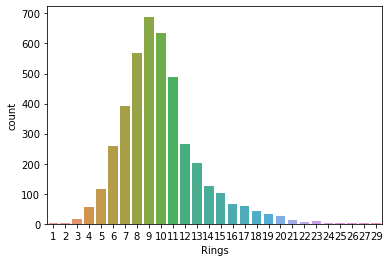

In [11]:
sns.countplot(data['Rings'])

In [12]:
print('Male', data.Sex.value_counts()[0])
print('Female', data.Sex.value_counts()[1])
print('infant', data.Sex.value_counts()[2])

Male 1528
Female 1342
infant 1307


In [13]:
# Check missing Values
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

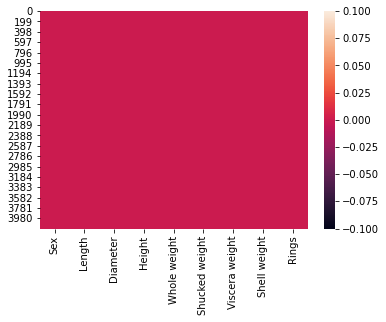

In [14]:
# see missing throw heatmap
sns.heatmap(data.isna())
plt.show()

In [15]:
# we observed there is no missing values

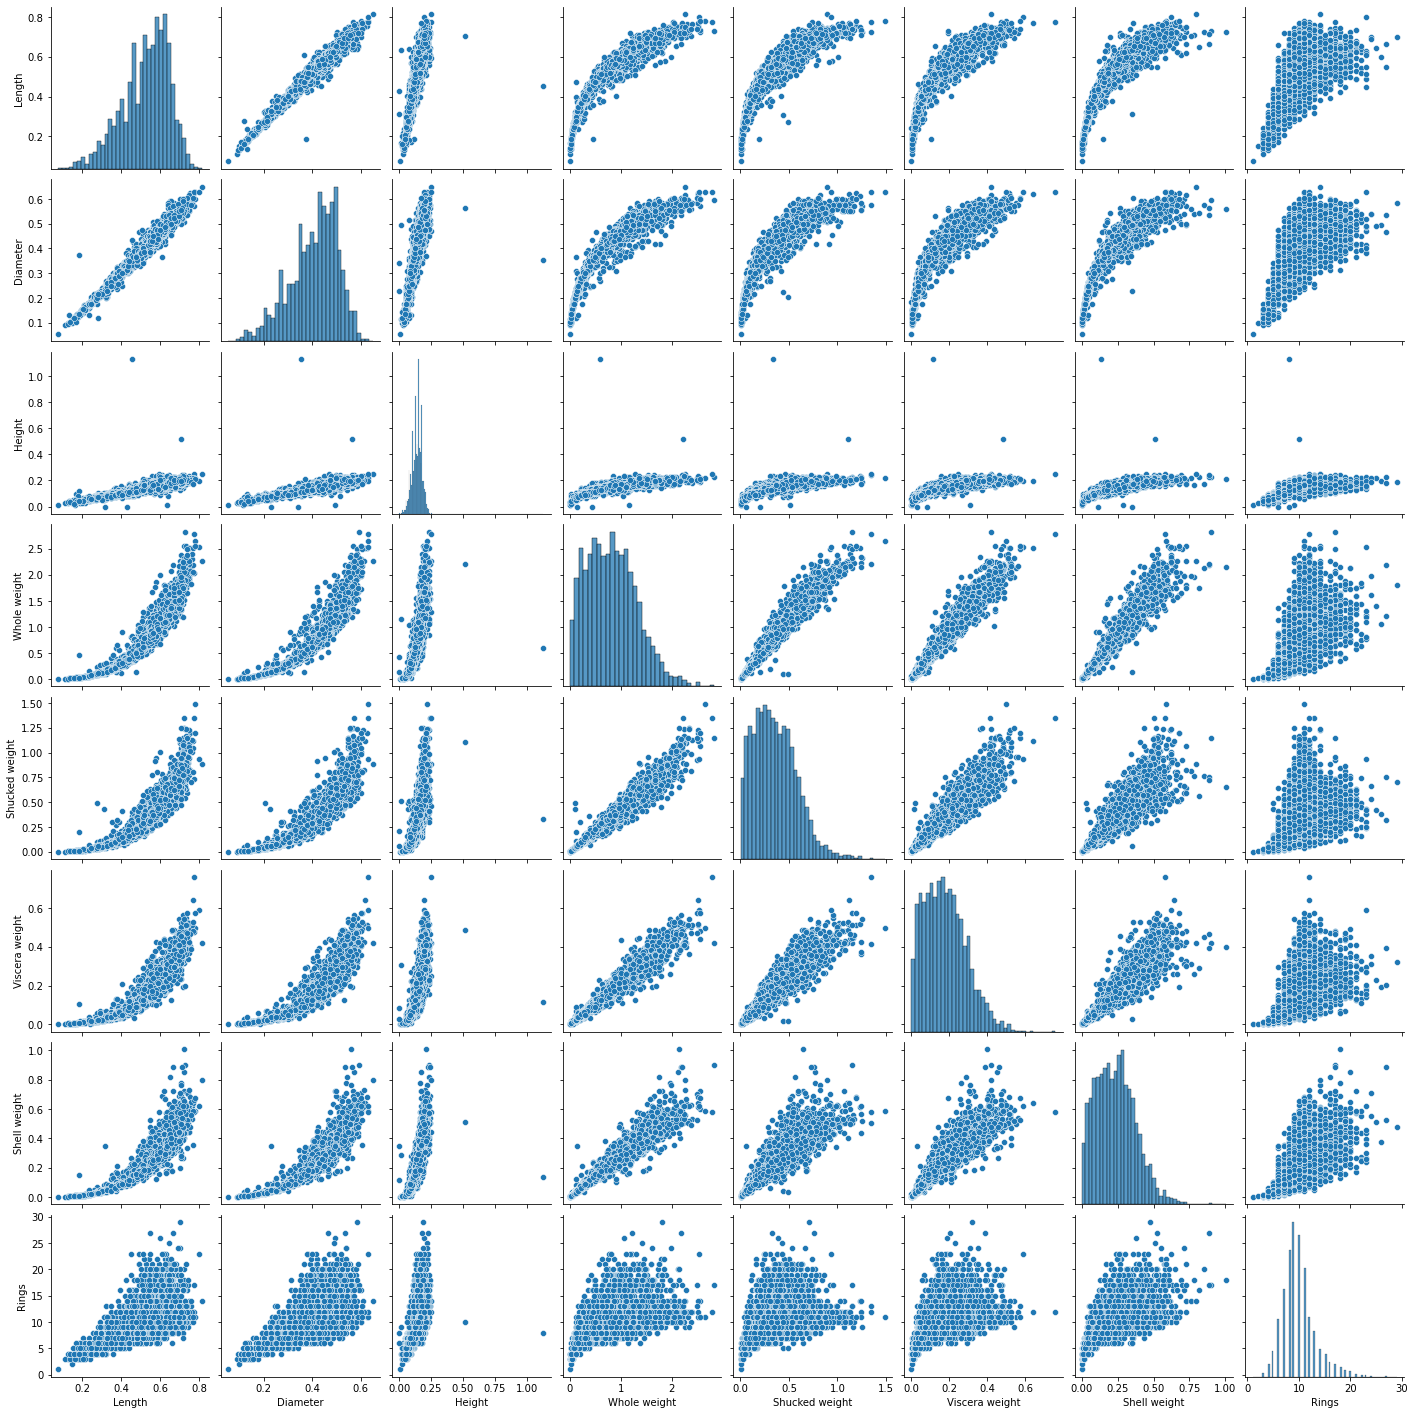

In [16]:
# pairplot
sns.pairplot(data)
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] =le.fit_transform(data['Sex'])


In [18]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [19]:
# Check Correlation
cor = data.corr()
cor

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


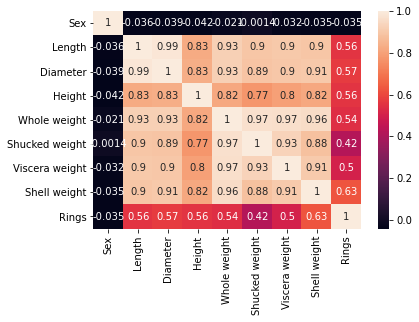

In [20]:
sns.heatmap(cor,annot=True)
plt.show()

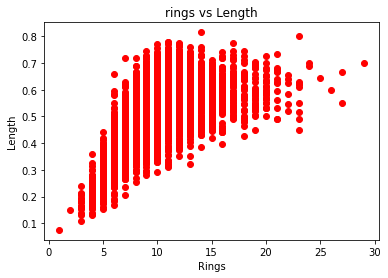

In [21]:
plt.scatter(data['Rings'],data['Length'], color = 'red')
plt.xlabel('Rings')
plt.ylabel('Length')
plt.title('rings vs Length')
plt.show()

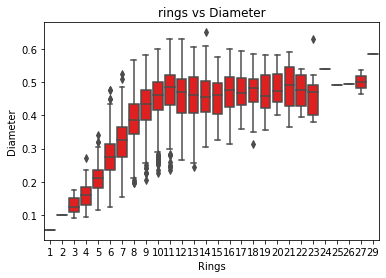

In [22]:
sns.boxplot(data['Rings'],data['Diameter'], color = 'red')
plt.xlabel('Rings')
plt.ylabel('Diameter')
plt.title('rings vs Diameter')
plt.show()

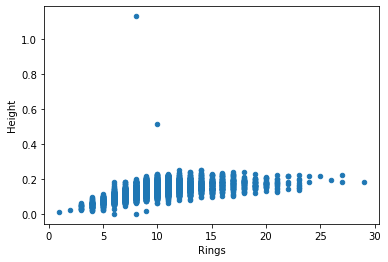

In [23]:
data.plot(kind='scatter', x='Rings', y='Height')
plt.show()

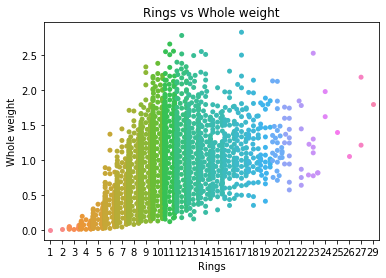

In [24]:
sns.swarmplot(data['Rings'], data['Whole weight'])
plt.title('Rings vs Whole weight')
plt.show()

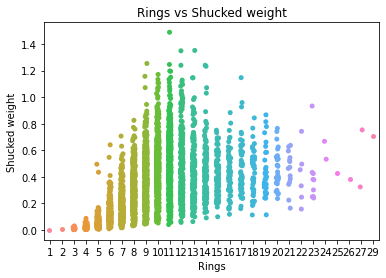

In [25]:
sns.stripplot(data['Rings'], data['Shucked weight'])
plt.title('Rings vs Shucked weight')
plt.show()

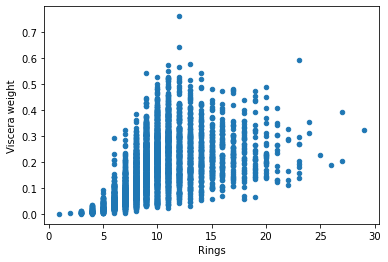

In [26]:
data.plot(kind='scatter', x='Rings', y='Viscera weight')
plt.show()

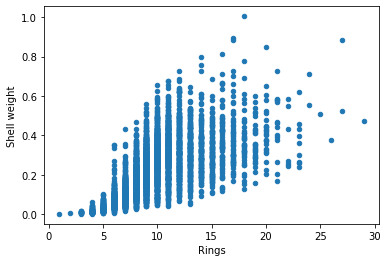

In [27]:
data.plot(kind='scatter', x='Rings', y='Shell weight')
plt.show()

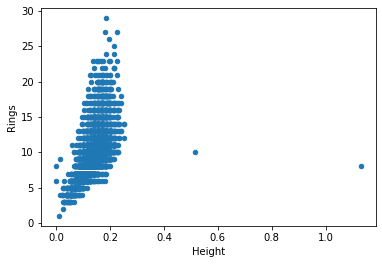

In [28]:
data.plot(kind='scatter', x='Height', y='Rings')
plt.show()

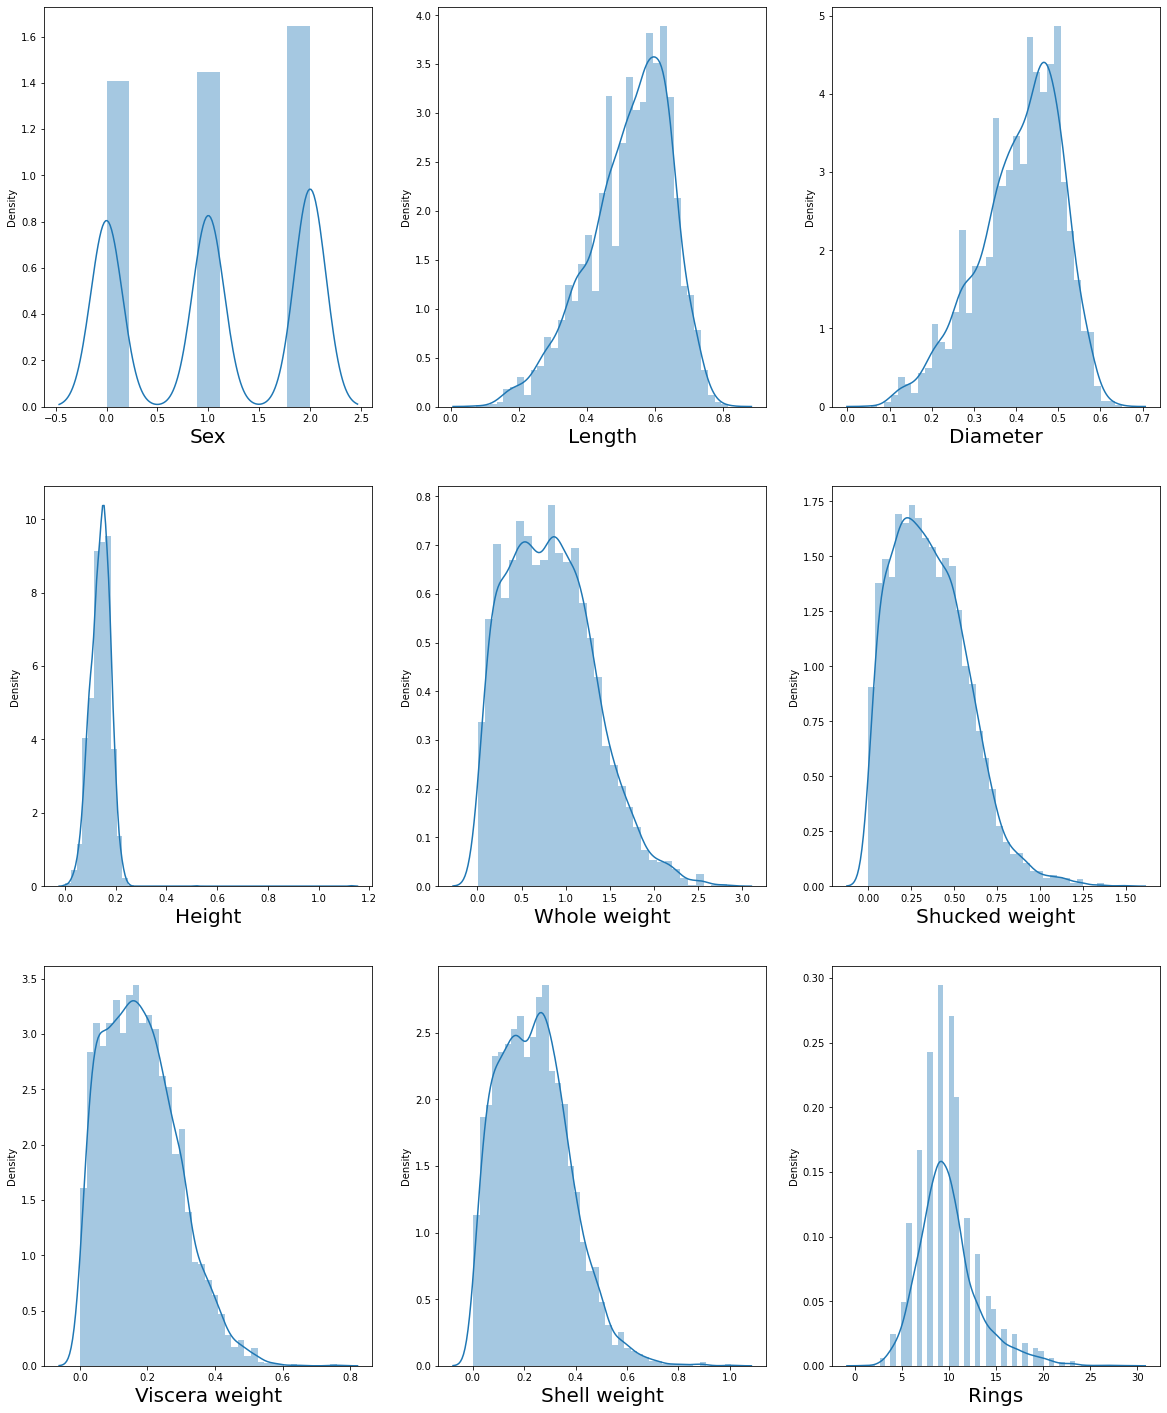

In [29]:
# Let's see how data is distributed for every column

plt.figure(figsize=(20,25), facecolor='White')
plotnumber = 1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        plotnumber=plotnumber+1
        
plt.show()

In [30]:
data.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [31]:
X = data.drop(['Rings'], axis = 1)
y = data['Rings']

In [32]:
from sklearn.preprocessing import power_transform
X_new =power_transform(X)
X_new=pd.DataFrame(X_new,columns= X.columns)

In [33]:
X_new.shape

(4177, 8)

In [34]:
X_new.skew()

Sex              -0.176442
Length           -0.066669
Diameter         -0.065977
Height           -0.115483
Whole weight     -0.003980
Shucked weight    0.027351
Viscera weight    0.039780
Shell weight      0.023390
dtype: float64

In [35]:
# Now we deal we  class imbalance 

In [36]:
from imblearn.over_sampling import RandomOverSampler

In [37]:
from imblearn.over_sampling import RandomOverSampler
ros  = RandomOverSampler()
X_new, y_new = ros.fit_resample(X_new,y)

In [38]:
print(y_new.value_counts())


15    689
14    689
1     689
17    689
2     689
18    689
3     689
19    689
4     689
20    689
5     689
21    689
6     689
22    689
7     689
23    689
8     689
24    689
9     689
25    689
10    689
26    689
11    689
27    689
12    689
13    689
29    689
16    689
Name: Rings, dtype: int64


In [39]:
from sklearn.preprocessing import StandardScaler
score =StandardScaler()
X_score = score.fit_transform(X_new)

In [58]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_score, y_new, test_size = 0.25, random_state = 10)

In [59]:
#K-Nearest Neighbors
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
print('Training Score :', knn.score(x_train,y_train))
print('Training Score :', knn.score(x_test,y_test))
y_predict = knn.predict(x_test)
cfm = confusion_matrix(y_test,y_predict)
print(classification_report(y_test,y_predict))

Training Score : 0.8729697974980993
Training Score : 0.8013684428778768
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       164
           2       1.00      1.00      1.00       170
           3       0.98      1.00      0.99       168
           4       0.92      0.98      0.95       167
           5       0.77      0.95      0.85       169
           6       0.58      0.63      0.60       182
           7       0.39      0.37      0.38       187
           8       0.35      0.27      0.31       173
           9       0.23      0.16      0.19       178
          10       0.20      0.15      0.17       158
          11       0.35      0.25      0.29       191
          12       0.59      0.47      0.52       168
          13       0.52      0.58      0.55       163
          14       0.74      0.84      0.79       166
          15       0.83      0.88      0.85       194
          16       0.84      1.00      0.92       167
         

In [60]:
from sklearn.model_selection import cross_val_score
clf=cross_val_score(KNeighborsClassifier(),X,y,cv=5).mean()
clf

0.23557917657507949

In [61]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
print(dtc.score(x_train,y_train))
print(dtc.score(x_test,y_test))
y_predict = dtc.predict(x_test)
cfm = confusion_matrix(y_test,y_predict)
print(classification_report(y_test,y_predict))

1.0
0.886377773170226
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       164
           2       1.00      1.00      1.00       170
           3       1.00      1.00      1.00       168
           4       0.98      1.00      0.99       167
           5       0.97      1.00      0.98       169
           6       0.83      0.88      0.86       182
           7       0.72      0.74      0.73       187
           8       0.45      0.42      0.43       173
           9       0.28      0.21      0.24       178
          10       0.34      0.27      0.30       158
          11       0.66      0.59      0.62       191
          12       0.84      0.86      0.85       168
          13       0.79      0.90      0.84       163
          14       0.92      0.99      0.96       166
          15       0.93      0.99      0.96       194
          16       0.96      1.00      0.98       167
          17       0.98      1.00      0.99       165
     

In [62]:
from sklearn.model_selection import cross_val_score
clf=cross_val_score(DecisionTreeClassifier(),X,y,cv=5).mean()
clf

0.2015812394350056

In [43]:
#RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
print('Training Score :', rfc.score(x_train,y_train))
print('Training Score :', rfc.score(x_test,y_test))
y_predict = rfc.predict(x_test)
cfm = confusion_matrix(y_test,y_predict)
print(classification_report(y_test,y_predict))

Training Score : 1.0
Training Score : 0.8919759485797222
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       164
           2       1.00      1.00      1.00       170
           3       1.00      1.00      1.00       168
           4       0.98      1.00      0.99       167
           5       0.97      1.00      0.99       169
           6       0.80      0.90      0.85       182
           7       0.71      0.73      0.72       187
           8       0.52      0.50      0.51       173
           9       0.36      0.28      0.32       178
          10       0.31      0.27      0.29       158
          11       0.64      0.58      0.60       191
          12       0.86      0.85      0.85       168
          13       0.84      0.91      0.87       163
          14       0.92      0.99      0.96       166
          15       0.96      0.99      0.97       194
          16       0.98      1.00      0.99       167
          17       0.98 

In [44]:
from sklearn.model_selection import cross_val_score
clf=cross_val_score(RandomForestClassifier(),X,y,cv=5).mean()
clf

0.24707618256310343

we are getting highest accuracy with DecisionTreeClassifier(89%) 

In [45]:
#Now we use hyperparameter tunning

In [63]:
from sklearn.model_selection import GridSearchCV


In [71]:
grid_param = {"criterion": ["gini","entropy"],
              "max_depth": range(2,10,3),  
              "min_samples_leaf": range(1,10,2),# spelling, best way to check the parameters is to copy them from documentation
              "min_samples_split":range(2,10,2)
             
} 

In [86]:
grid_Search = GridSearchCV(estimator = DecisionTreeClassifier(),param_grid = grid_param, cv = 5, n_jobs = -1)

In [87]:
grid_Search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [89]:
best_parameter = grid_Search.best_params_
print(best_parameter)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 8}


In [91]:
clf= DecisionTreeClassifier(criterion = 'entropy',max_depth = 8, min_samples_leaf = 1, min_samples_split = 8)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=8)

In [92]:
clf.score(x_train,y_train)

0.6155919552145968

In [93]:
y_predict = clf.predict(x_test)

In [94]:
cfm = confusion_matrix(y_test,y_predict)


In [95]:
print(classification_report(y_test,y_predict, digits=2))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       164
           2       1.00      1.00      1.00       170
           3       0.82      0.96      0.88       168
           4       0.73      0.81      0.77       167
           5       0.61      0.65      0.63       169
           6       0.41      0.47      0.44       182
           7       0.35      0.24      0.28       187
           8       0.21      0.37      0.27       173
           9       0.23      0.12      0.16       178
          10       0.17      0.18      0.17       158
          11       0.35      0.03      0.06       191
          12       0.38      0.11      0.17       168
          13       0.18      0.13      0.15       163
          14       0.61      0.07      0.12       166
          15       0.43      0.12      0.19       194
          16       0.43      0.23      0.30       167
          17       0.49      0.39      0.43       165
          18       0.33    

In [56]:

#Saving the model
import joblib 
joblib.dump(rf,"abalone.pkl")

['abalone.pkl']

In [ ]:
we conclude that DecisionTreeClassifier(89%)  give highest accuracy.